In [1]:
## define library
import torch
from torch import nn
from d2l import torch as d2l

In [29]:
def dropout_layer(X,dropout=0.5):
    assert 0<=dropout<=1
    if dropout==1:
        return torch.zeros_like(X)
    if dropout==0:
        return X
#     mask = (torch.rand(X.shape) > dropout).float()
#     return mask * X / (-+..1.0 - dropout)
    mask = (torch.rand(X.shape)>dropout).float()
    return mask*X/(1.0-dropout)

In [30]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 18., 20., 22.,  0., 26., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [31]:
# Define model parameter

In [32]:
num_input, num_output, hidden1, hidden2 = 784, 10, 256, 256

In [33]:
# Defining model

In [37]:
dropout1 = 0.2
dropout2 = 0.5 
## Try changing the dropouts

class Net(nn.Module):
    def __init__(self, num_input, num_output, hidden1, hidden2, is_training = True):
        super(Net,self).__init__()
        self.num_input = num_input
        self.training = is_training
        self.lin1 = nn.Linear(num_input, hidden1)
        self.lin2 = nn.Linear(hidden1, hidden2)
        self.lin3 = nn.Linear(hidden2, num_output)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_input))))
        if self.training==True:
            H1 = dropout_layer(H1,dropout1)
        
        H2 = self.relu(self.lin2(H1))
        if self.training==True:
            H2 = dropout_layer(H2,dropout2)
        
        out = (self.lin3(H2))
        return out # no use of activation as we will use 
        
        
        
net = Net(num_input, num_output, hidden1, hidden2)

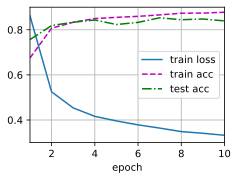

In [41]:
num_epochs=10
lr = 0.5
batch_size = 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3 ( net, train_iter, test_iter, loss, num_epochs, trainer)

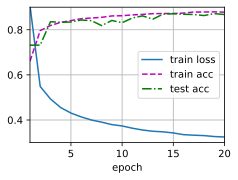

In [43]:
dropout1 = 0.5
dropout2 = 0.2 
## Try changing the dropouts

class Net(nn.Module):
    def __init__(self, num_input, num_output, hidden1, hidden2, is_training = True):
        super(Net,self).__init__()
        self.num_input = num_input
        self.training = is_training
        self.lin1 = nn.Linear(num_input, hidden1)
        self.lin2 = nn.Linear(hidden1, hidden2)
        self.lin3 = nn.Linear(hidden2, num_output)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_input))))
        if self.training==True:
            H1 = dropout_layer(H1,dropout1)
        
        H2 = self.relu(self.lin2(H1))
        if self.training==True:
            H2 = dropout_layer(H2,dropout2)
        
        out = (self.lin3(H2))
        return out # no use of activation as we will use 
        
        
        
net = Net(num_input, num_output, hidden1, hidden2)

num_epochs=20
lr = 0.5
batch_size = 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3 ( net, train_iter, test_iter, loss, num_epochs, trainer)

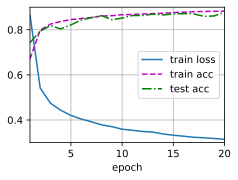

In [44]:
dropout1 = 0.5
dropout2 = 0.2 
## Try changing the dropouts

class Net(nn.Module):
    def __init__(self, num_input, num_output, hidden1, hidden2, is_training = True):
        super(Net,self).__init__()
        self.num_input = num_input
        self.training = is_training
        self.lin1 = nn.Linear(num_input, hidden1)
        self.lin2 = nn.Linear(hidden1, hidden2)
        self.lin3 = nn.Linear(hidden2, num_output)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_input))))
        if self.training==True:
            H1 = dropout_layer(H1,dropout1)
        
        H2 = self.relu(self.lin2(H1))
        if self.training==True:
            H2 = dropout_layer(H2,dropout2)
        
        out = (self.lin3(H2))
        return out # no use of activation as we will use 
        
        
        
net = Net(num_input, num_output, hidden1, hidden2, False)

num_epochs=20
lr = 0.5
batch_size = 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3 ( net, train_iter, test_iter, loss, num_epochs, trainer)

In [39]:
help(d2l.load_data_fashion_mnist)

Help on function load_data_fashion_mnist in module d2l.torch:

load_data_fashion_mnist(batch_size, resize=None)
    Download the Fashion-MNIST dataset and then load it into memory.



In [40]:
help(d2l.train_ch3)

Help on function train_ch3 in module d2l.torch:

train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
    Train a model (defined in Chapter 3).

